# Importing the libraries 

In [1]:
import pandas as pd 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline 

# Load the Data

In [55]:
airbnb = pd.read_csv('AB_NYC_2019.csv')
airbnb_copy = airbnb.copy()

# Exploratory Data Analysis

In [11]:
airbnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [12]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

# Data Types 

In [13]:
cat_df = airbnb.select_dtypes(include=['object'])
num_df = airbnb.select_dtypes(exclude=['object'])

def printcolumntypes(non_numeric_df, numeric_df):
    ''' Separates non-numeric and numeric columns'''
    print("Non-Numeric columns:")
    for col in non_numeric_df:
        print(f"{col}")
    print("")
    print("Numeric columns:")
    for col in numeric_df:
        print(f"{col}")
        
printcolumntypes(cat_df, num_df)

Non-Numeric columns:
name
host_name
neighbourhood_group
neighbourhood
room_type
last_review

Numeric columns:
id
host_id
latitude
longitude
price
minimum_nights
number_of_reviews
reviews_per_month
calculated_host_listings_count
availability_365


# Missing Data

## Columns with missing values 

In [21]:
def missing_cols(df):
    ''' Prints out columns with its amount of missing values'''
    total = 0 
    for col in df.columns:
        missing_vals = df[col].isnull().sum()
        total += missing_vals
        if missing_vals != 0:
            print(f"{col} => {df[col].isnull().sum()}")
            
    if total == 0:
        print("no missing values left")

missing_cols(airbnb)

name => 16
host_name => 21
last_review => 10052
reviews_per_month => 10052


## Percentage missing

In [22]:
def perc_missing(df):
    ''' Prints out columns with missing values with its percentages'''
    for col in df.columns:
        pct = df[col].isna().mean() * 100
        if (pct != 0):
            print('{} => {}%'.format(col, round(pct, 2)))
            
perc_missing(airbnb)

name => 0.03%
host_name => 0.04%
last_review => 20.56%
reviews_per_month => 20.56%


## Heatmap of missing values

<AxesSubplot:>

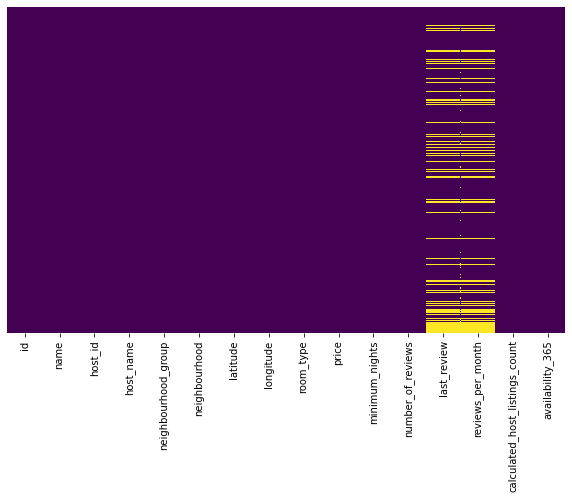

In [23]:
plt.figure(figsize=(10, 6))
sns.heatmap(airbnb.isnull(), yticklabels=False, cmap='viridis', cbar=False)

# Techniques to deal with missing values 

1. Drop the feature
2. Drop the row
3. Impute the missing value
4. Replace it

## Dropping Feature 

In [24]:
# Drop unnecessary colunms that are not important 
colsToDrop = ['id', 'host_name', 'last_review']

airbnb.drop(colsToDrop, axis=1, inplace=True)

missing_cols(airbnb)

name => 16
reviews_per_month => 10052


## Dropping the Row

In [ ]:
# Remove rows with missing values
airbnb['price'].dropna(inplace=true)

## Imputing

1. fillna - filling in null values based on a given value (mean, median, mode, or specified value)


2. bfill / ffill - stands for backward fill and forward fill (filling in missing values based on the value after or before the column)


3. Simple Imputer - Sk-learn's built in function that imputes missing values (commonly used alongside a pipeline when building ML models)

In [ ]:
# Imputing price with mean
price_mean_value = round(airbnb['price'].mean(), 2)
airbnb['price'].fillna(price_mean_value, inplace=True)

# Imputing price with median 
price_median_value = round(airbnb['price'].median(), 2)
airbnb['price'].fillna(price_median_value, inplace=True)

# Imputing with bfill or ffill
airbnb['price'].bfill(inplace=True)
airbnb['price'].ffill(inplace=True)

# Imputing with SimpleImputer from sklearn library
from sklearn.impute import SimpleImputer

# Define the imputer
imr = SimpleImputer(missing_values=np.nan, strategy='mean') # or median

airbnb[['price']] = imr.fit_transform(airbnb[['price']])

# Use strategy = 'most_frequent' for categorical data

## Replace 

In [27]:
# Replace null values in reviews_per_month with 0
airbnb.fillna({'reviews_per_month':0}, inplace=True)

missing_cols(airbnb)

name => 16


In [28]:
# Replace null values in name with 'None'
airbnb.fillna({'name': 'None'}, inplace=True)

missing_cols(airbnb)

no missing values left


# Inconsistent data/irrelevant features 

## Remove rows based on regex

In [35]:
# Example: remove rows that contain the target word
target = '[Nn]oisy'

noisy_airbnb = airbnb[airbnb['name'].str.contains(target, regex=True)]

# Show rows that contains the word noisy
print(noisy_airbnb['name'])

# Get the index that contains the word noisy
index_to_drop = noisy_airbnb['name'].index

# print(index_to_drop)
print(len(airbnb))

Series([], Name: name, dtype: object)
Int64Index([], dtype='int64')


In [36]:
# Drop rows based on index
airbnb.drop(index_to_drop, axis='index', inplace=True)


print(len(airbnb))

48892


## Spelling errors in categorical data

In [37]:
airbnb['neighbourhood_group'].value_counts()

Manhattan        21659
Brooklyn         20103
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

In [48]:
airbnb['neighbourhood_group'].replace(['xronx'], ['Bronx'], inplace=True)

airbnb['neighbourhood_group'].value_counts()

Manhattan        21659
Brooklyn         20103
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

## Renaming Columns 

In [49]:
new_names = {'name':'listing_name', 'latitude':'lat', 'longitude':'long'}

airbnb.rename(columns=new_names, inplace=True)
airbnb.head()

,listing_name,host_id,neighbourhood_group,neighbourhood,lat,long,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Skylit Midtown Castle,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
3,Cozy Entire Floor of Brownstone,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,Entire Apt: Spacious Studio/Loft by central park,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


## Converting to DateTime 

In [56]:
airbnb_copy['last_review'] = pd.to_datetime(airbnb_copy['last_review'], format='%')
airbnb_copy['last_review'].dtype.type

numpy.datetime64

## Duplicates

In [59]:
airbnb.duplicated().any()

## If true
# airbnb.drop_duplicates()

## If you want to drop duplicates at specific column
# airbnb.drop('col_name', axis=1, inplace=True).drop_duplicates()

False

## Change data type to reduce memory 

In [61]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [62]:
airbnb['host_id'] = airbnb['host_id'].astype('int32')
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int32  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

# Outliers

In [63]:
airbnb['price'].describe()

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

<AxesSubplot:>

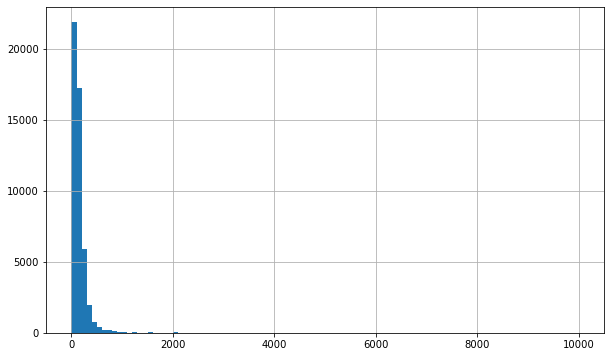

In [64]:
plt.figure(figsize=(10,6))
airbnb['price'].hist(bins=100)

<AxesSubplot:>

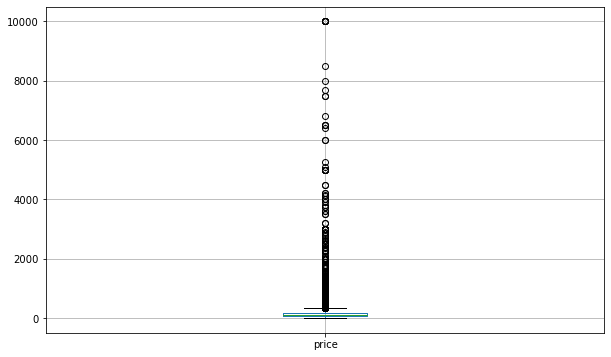

In [65]:
plt.figure(figsize=(10,6))
airbnb.boxplot(column=['price'])

<AxesSubplot:>

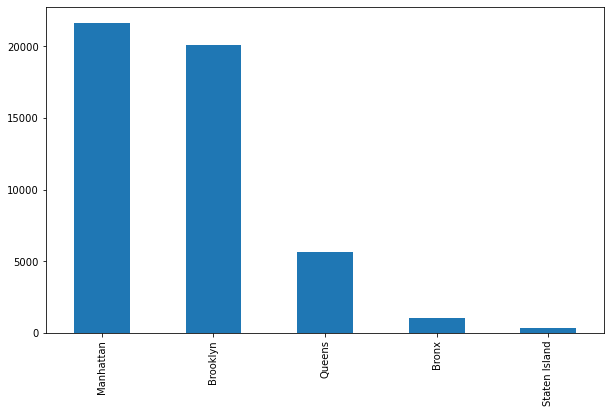

In [66]:
plt.figure(figsize=(10,6))
airbnb['neighbourhood_group'].value_counts().plot.bar()